<a href="https://colab.research.google.com/github/JunHyeong-data/ML-DL-Study/blob/main/Basic-Deep-Learning/23_Object_detection_%EC%9D%B8%ED%8A%B8%EB%A1%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection & Image Segmentation 개요

## 1. 지금까지 배운 내용 정리

지금까지 우리는 두 개의 Chapter를 통해 **Neural Network**를 학습했다.

- **Chapter 1**  
  - Neural Network의 기초 개념
- **Chapter 2**  
  - 이미지를 다루는 Neural Network
  - CNN
  - ResNet
  - MobileNet
  - Transfer Learning

지금까지 다룬 문제의 핵심은 **Image Classification**이었다.

이미지 분류는 매우 중요한 문제이지만, 실제 어플리케이션에서는 이보다 훨씬 더 복잡한 문제를 해결해야 하는 경우가 많다.

---

## 2. 이번 Chapter에서 다룰 내용

이번 챕터에서는 컴퓨터 비전의 더 복잡하고 다양한 문제를 다룬다.

- **Object Detection**
- **Image Segmentation**

Neural Network를 활용해 이 문제들을 해결하는 방법은 매우 다양하다.

대표적인 예시:
- R-CNN 계열
- Faster R-CNN
- Mask R-CNN
- Segment Anything (SAM) 등

👉 하지만 **모든 아키텍처를 다 알 필요는 없다.**

---

## 3. 실무 관점에서 중요한 점

최근 Neural Network 사용자들의 흐름은 다음과 같다.

- 새로운 모델을 직접 설계하기보다는
- **기존에 잘 만들어진 모델을**
- **내가 가진 문제와 데이터에 맞게 학습(fine-tuning)** 하는 데 집중

즉,

> 모델 구조에 대한 깊은 이해보다  
> **문제 자체와 데이터에 대한 이해가 훨씬 더 중요하다**

이러한 이유로 이번 챕터에서는  
- **문제 이해(Object Detection 자체)** 에 초점을 두고  
- 모델은 **기본적인 Faster R-CNN 하나만** 다룬다.

Transformer 기반 모델(Vision Transformer, Multimodal 학습)은  
👉 이후 챕터에서 다시 다룰 예정이다.

---

## 4. Object Detection이 어려운 이유

### 4.1 Image Classification과의 차이

**Image Classification**
- 이미지 전체에 대해 하나의 레이블만 예측
- 객체의 위치, 크기는 고려하지 않음
- 예:
  - 강아지가 어디 있든
  - 크기가 크든 작든
  - 결과는 하나의 레이블 (예: `dog`)

**Object Detection**
- 훨씬 더 많은 정보를 예측해야 함

---

### 4.2 Object Detection에서 고려해야 할 요소

1. **입력 이미지 크기가 고정되지 않음**
   - 800 × 600
   - 4000 × 2000 등 다양한 해상도

2. **객체의 위치와 크기**
   - 보통 두 개의 점으로 표현
   - `(x1, y1), (x2, y2)`
   - 이를 통해 **Bounding Box** 정의

3. **여러 개의 객체**
   - 한 이미지에 객체가 하나일 수도, 여러 개일 수도 있음

4. **다양한 레이블**
   - 사람, 강아지, 자전거, 노트북 등 여러 클래스 동시 존재

5. **객체 간 겹침(Overlap)**
   - 서로 겹쳐 있는 객체도 검출해야 함

➡️ 이 모든 이유 때문에 Object Detection은  
Image Classification보다 훨씬 복잡한 문제다.

---

## 5. Neural Network 구조와 출력 형태

문제가 복잡해진 만큼 이를 해결하는 Neural Network 구조도 복잡해진다.

이번 영상에서는:
- 복잡한 내부 구조 설명 ❌
- **실제로 Object Detection 모델을 실행했을 때 어떤 Output이 나오는지** ✅

---

## 6. PyTorch Pretrained Object Detection 모델 실행

PyTorch에서 제공하는 Vision 모델을 살펴보면:

- Pretrained 모델들이 미리 제공됨
- Object Detection 탭에서 여러 모델 확인 가능
- 각 모델별 성능 지표도 제공됨

> 성능 지표의 의미는 다음 시간에 다룬다.

이번 시간에는 **샘플 코드를 그대로 실행**해본다.

---

## 7. 실행 결과 예시

### 7.1 입력 이미지
- 자전거
- 사람
- 강아지
- 노트북 등  
여러 객체가 포함된 복잡한 이미지

### 7.2 출력 결과

- 각 객체에 대해 **빨간색 Bounding Box**가 표시됨
- 예:
  - 사람
  - 오븐
  - 강아지
  - 자전거
  - 테이블 등

---

## 8. Object Detection 모델의 Output 구성

Neural Network의 출력(prediction)을 살펴보면 다음 정보를 포함한다.

### 8.1 Bounding Box
- `(x1, y1, x2, y2)`
- 객체의 위치와 크기 정보

### 8.2 Label
- 숫자로 표현됨
- 메타 정보(category)를 통해 실제 객체 이름으로 매핑 가능

### 8.3 Score
- 해당 객체가 맞을 확률
- 값이 클수록 신뢰도가 높음

---

## 9. Object Detection을 블랙박스로 보면

Object Detection Neural Network를 하나의 블랙박스로 생각하면:

- **Input**
  - 이미지

- **Output**
  - 각 객체의
    - 위치 (Bounding Box)
    - 레이블
    - 점수(score)

---

## 10. 정리

이번 시간에는:

- Object Detection 문제의 복잡성을 이해했고
- Pretrained Neural Network를 직접 실행해 보면서
- Object Detection 모델의 Output 형태를 확인했다.

👉 다음 시간에는  
**Object Detection 모델 중 가장 중요한 Faster R-CNN**에 대해 자세히 알아볼 예정이다.


In [32]:
# 1. 기존 폴더 삭제
!rm -rf deepLearning

# 2. 다시 클론
!git clone https://github.com/NoCodeProgram/deepLearning.git

Cloning into 'deepLearning'...
remote: Enumerating objects: 318, done.
remote: Counting objects: 100% (179/179), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 318 (delta 80), reused 134 (delta 55), pack-reused 139 (from 1)
Receiving objects: 100% (318/318), 17.60 MiB | 20.09 MiB/s, done.
Resolving deltas: 100% (116/116), done.


/usr/local/lib/python3.12/dist-packages/torchvision/utils.py:375: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")
/tmp/ipython-input-1828703267.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


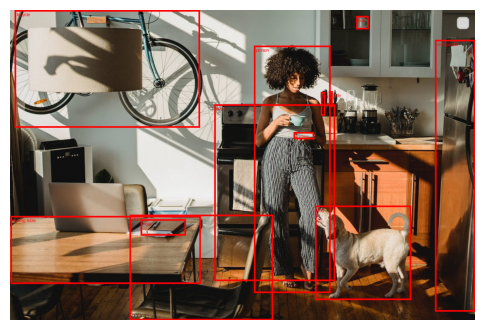

In [44]:
from torchvision.io.image import read_image
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image
import matplotlib.pyplot as plt

img = read_image('deepLearning/detectSegment/sample.jpeg')

weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)
model.eval()

preprocess = weights.transforms()

batch = [preprocess(img)]

prediction = model(batch)[0]
labels = [weights.meta['categories'][i] for i in prediction['labels']]
"""
prediction['labels']   → [1, 17, 18]  (숫자)
weights.meta['categories'] → ['__background__','person','bicycle','car',...,'cat','dog']
labels = [categories[i] for i in prediction['labels']] → ['person','cat','dog']
"""
box = draw_bounding_boxes(img, boxes=prediction["boxes"],
                          labels=labels,
                          colors="red",
                          width=4, font_size=30)
im = to_pil_image(box.detach())
plt.figure(figsize=(6, 6))
plt.imshow(im)
plt.axis("off")
plt.legend()
plt.show()

## 1️⃣ 모델은 이미지를 보고 **무엇이 있는지 추론**한다

* Faster R-CNN 모델이 이미지를 입력받으면:

  1. Backbone (ResNet-50) → 이미지 특징(feature) 추출
  2. RPN (Region Proposal Network) → “객체 있을 법한 영역 후보” 생성
  3. ROI Head → 각 후보 영역에서

     * **클래스 index** 예측 (`prediction['labels']`)
     * **박스 좌표** 예측 (`prediction['boxes']`)
     * **확신도(score)** 예측 (`prediction['scores']`)

* 즉, 모델이 **숫자 형태로 클래스**를 이미 예측함

  * 예: `[1, 17, 18]`



In [39]:
print(weights.meta['categories'])

['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [40]:
print(prediction.keys())

dict_keys(['boxes', 'labels', 'scores'])


In [41]:
print(prediction['scores'].shape)

torch.Size([12])


In [42]:
print(prediction['scores'])

tensor([0.9997, 0.9971, 0.9968, 0.9952, 0.9932, 0.9880, 0.9696, 0.9662, 0.9588,
        0.9564, 0.9352, 0.9243], grad_fn=<IndexBackward0>)
